# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [12]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [13]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


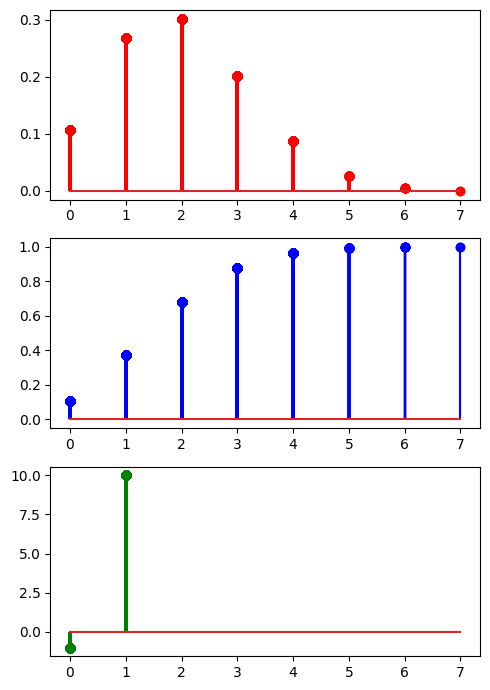

In [14]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

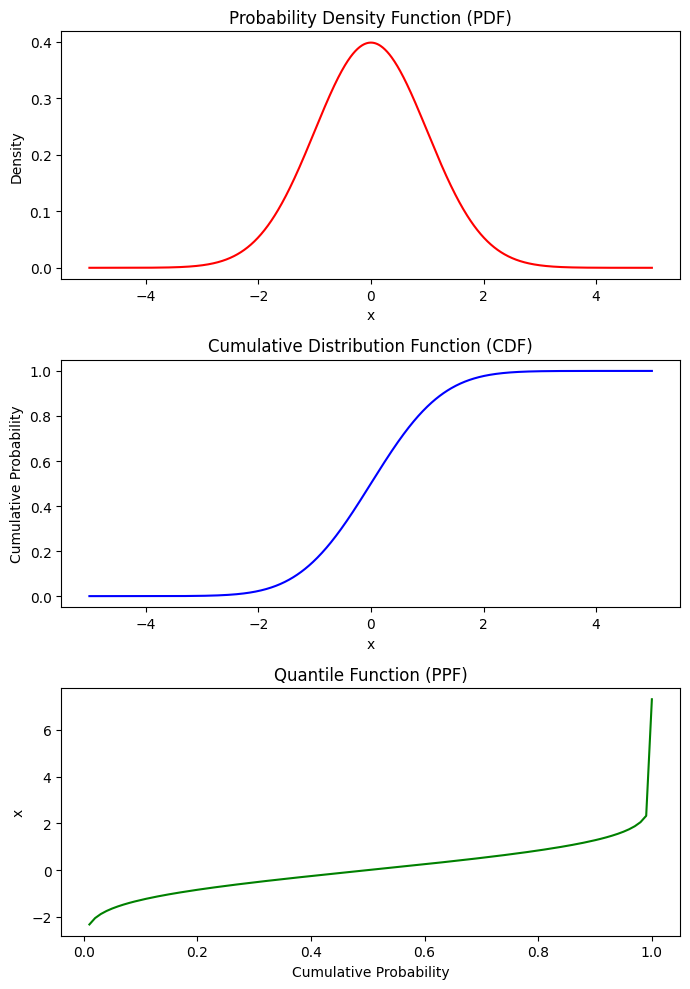

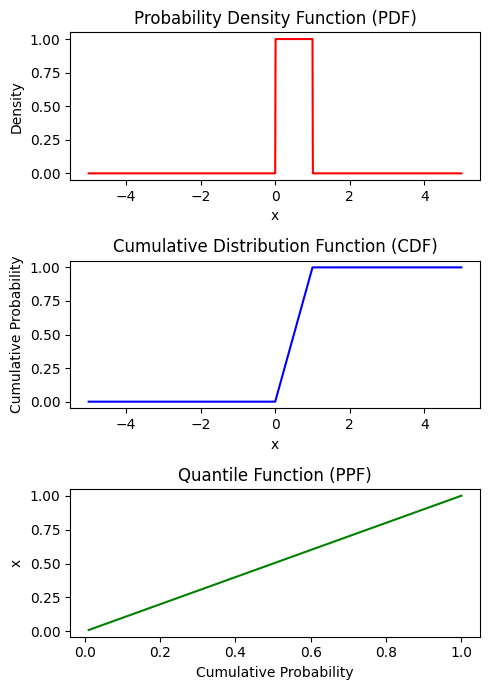

In [ ]:
# TODO

from scipy.stats import norm,uniform
import numpy as np
import matplotlib.pyplot as plt

#He seguido la misma structura que arriba, definir las funciones y despues plotearlas.

#1- Distribución normal

#PDF (Probability Density Function): Calcula la densidad de probabilidad para un valor dado.
def pdf_norm(x,mean=0,sd=1):
    result = norm.pdf(x, loc = mean, scale = sd)
    return result
    
#CDF (Cumulative Distribution Function): Calcula la probabilidad acumulada hasta cierto valor.
def cdf_norm(x, mean=0, sd=1):
    result = norm.cdf(x=x, loc=mean, scale=sd)
    return result

# Función de cuantiles (Quantile)
def Quan_norm(p, mean = 0, sd = 1):
    result = norm.ppf(q = p, loc = mean, scale = sd)
    return result

# Función variables aleatorias de una distribución normal(Rnorm)
def random_norm(n, mean = 0, sd = 1):
    result = norm.rvs(size = n, loc = mean, scale = sd)
    return result


#2 - Distribución uniforme

# Probability Density Function (PDF)
def pdf_unif(x, a=0, b=1):
    return uniform.pdf(x, loc=a, scale=b-a)

# Cumulative Distribution Function (CDF)
def cdf_unif(q, a=0, b=1):
    return uniform.cdf(q, loc=a, scale=b-a)

# Quantile function 
def quant_unif(p, a=0, b=1):
    return uniform.ppf(p, loc=a, scale=b-a)

# Random variates
def random_unif(n, a=0, b=1):
    return uniform.rvs(loc=a, scale=b-a, size=n)

#Ploteando las funciones de la distribución normal

np.random.seed(42) #Usamos el valor dado

mean= 0 
std= 1
data = np.arange(-5,5,0.01) #Rango de valores donde nos movemos

#Todas las funciones trabajan con la media y la desviación estándar (tal y como se mostraba)
pmf = pdf_norm(data, mean = mean, sd = std)
cdf = cdf_norm(data, mean = mean, sd = std)
ppf = Quan_norm(data, mean = mean, sd = std)

fig, axis = plt.subplots(3, 1, figsize=(7, 10))

#PDF
axis[0].plot(data, pmf, "r-", label="PDF") 
axis[0].set_title("Probability Density Function (PDF)")
axis[0].set_xlabel("x")
axis[0].set_ylabel("Density")

#CDF
axis[1].plot(data, cdf, "b-", label="CDF")  
axis[1].set_title("Cumulative Distribution Function (CDF)")
axis[1].set_xlabel("x")
axis[1].set_ylabel("Cumulative Probability")

#Función de Cuantil
axis[2].plot(data, ppf, "g-", label="PPF")  
axis[2].set_title("Quantile Function (PPF)")
axis[2].set_xlabel("Cumulative Probability")
axis[2].set_ylabel("x")

plt.tight_layout()
plt.show()
#----------------------------------------------------------------------------------------------------------------------------

#Gráficos para la distribución uniforme
np.random.seed(42)

#En este tipo de distribuciones debemos marcar el valor mínimo y máximo haciendo uso de las variables low y high
low = 0
high = 1
data = np.arange(-5, 5, 0.01) #Entiendo que hacer esto está MAL. Y que lo hacemos por funciones de visualización de gráfica
#¿Por qué debemos operar fuera del rango preestablecido de low y high? La gráfica solo tiene validez de 0 a 1
#he visto en otros ejemplos como a low se le llama low y a high se le otorga high (llegados a este punto es cuestión de cabezonería)
pmf = pdf_unif(data, a = low, b = high)
cdf = cdf_unif(data, a = low, b = high)
ppf = quant_unif(data, a = low, b = high)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

# Plotear las funciones de distribución uniforme

axis[0].plot(data, pmf, "r-", label="PDF")  #PDF
axis[0].set_title("Probability Density Function (PDF)")
axis[0].set_xlabel("x")
axis[0].set_ylabel("Density")

axis[1].plot(data, cdf, "b-", label="CDF")  #CDF
axis[1].set_title("Cumulative Distribution Function (CDF)")
axis[1].set_xlabel("x")
axis[1].set_ylabel("Cumulative Probability")

axis[2].plot(data, ppf, "g-", label="PPF")  #PPF
axis[2].set_title("Quantile Function (PPF)")
axis[2].set_xlabel("Cumulative Probability")
axis[2].set_ylabel("x")


plt.tight_layout()
plt.show()


